For those who are frustrated by their scores and need a quick reward...

I am using the following high-scoring kernels. If you like this notebook, please upvote them too!

- [WaveNet-Keras](https://www.kaggle.com/siavrez/wavenet-keras)
- [Single Model lgbm - Kalman Filter](https://www.kaggle.com/teejmahal20/single-model-lgbm-kalman-filter)
- [Seq2Seq RNN with GRU](https://www.kaggle.com/brandenkmurray/seq2seq-rnn-with-gru)
- [LGB + FeatureEngineering - LB 0.940](https://www.kaggle.com/rohitsingh9990/lgb-featureengineering-lb-0-940)
- [Simple two-layer bidirectional LSTM with Pytorch](https://www.kaggle.com/khalildmk/simple-two-layer-bidirectional-lstm-with-pytorch/output)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualize
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from matplotlib import pyplot
from matplotlib.ticker import ScalarFormatter
sns.set_context("talk")
style.use('fivethirtyeight')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from scipy import stats
from tqdm import tqdm_notebook as tqdm
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/single-model-lgbm-kalman-filter/__results__.html
/kaggle/input/single-model-lgbm-kalman-filter/submission.csv
/kaggle/input/single-model-lgbm-kalman-filter/__notebook__.ipynb
/kaggle/input/single-model-lgbm-kalman-filter/custom.css
/kaggle/input/single-model-lgbm-kalman-filter/__output__.json
/kaggle/input/liverpool-ion-switching/sample_submission.csv
/kaggle/input/liverpool-ion-switching/test.csv
/kaggle/input/liverpool-ion-switching/train.csv
/kaggle/input/wavenet-keras/preds.npy
/kaggle/input/wavenet-keras/__results__.html
/kaggle/input/wavenet-keras/submission.csv
/kaggle/input/wavenet-keras/WaveNet.log
/kaggle/input/wavenet-keras/__notebook__.ipynb
/kaggle/input/wavenet-keras/custom.css
/kaggle/input/wavenet-keras/oof.npy
/kaggle/input/wavenet-keras/__output__.json
/kaggle/input/simple-two-layer-bidirectional-lstm-with-pytorch/__results__.html
/kaggle/input/simple-two-layer-bidirectional-lstm-with-pytorch/__resultx__.html
/kaggle/input/simple-two-layer-bidirectional-

# Load all 

In [2]:
# load submission files
submit = pd.read_csv("/kaggle/input/liverpool-ion-switching/sample_submission.csv")

# high scoring public kernels
paths = {
    "wavenet": "/kaggle/input/wavenet-keras/submission.csv",
    "kalman": "/kaggle/input/single-model-lgbm-kalman-filter/submission.csv",
    "rnn": "/kaggle/input/seq2seq-rnn-with-gru/gru_preds.csv",
    "lgb-fe": "/kaggle/input/lgb-featureengineering-lb-0-940/submission.csv",
    "lstm": "/kaggle/input/simple-two-layer-bidirectional-lstm-with-pytorch/submission_bilstm.csv",
}
weights = np.array([0.941, 0.94, 0.94, 0.94, 0.94]) # LB score as a weight
subs = submit.copy()
for i, p in enumerate(paths.keys()):
    tmp = pd.read_csv(paths[p])
    subs[f"{p}"] = tmp["open_channels"]

subs.drop(columns=["time", "open_channels"], inplace=True)

# Similarity analysis

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text yticklabel objects>)

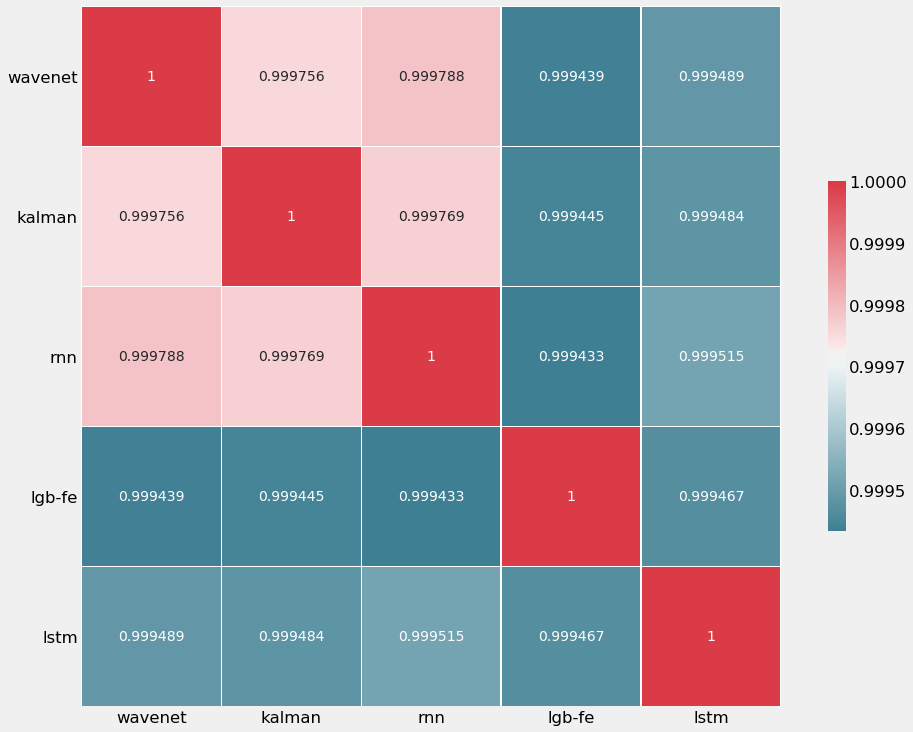

In [3]:
# Compute the correlation matrix
corr = subs.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, annot=True, fmt="g",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
ax.set_ylim(corr.shape[0], 0)
plt.yticks(rotation=0)

# Voting

In [4]:
# pandas weighted voting implementation
def weighted_voting(row):
    h = np.histogram(row.values, weights=weights)
    return np.round(h[1][np.argmax(h[0])])

In [5]:
submit["open_channels"] = subs.apply(weighted_voting, axis=1)

# Submit

In [6]:
submit["open_channels"] = submit["open_channels"].astype(int)
submit.to_csv('submission_voting.csv', index=False, float_format='%.4f')

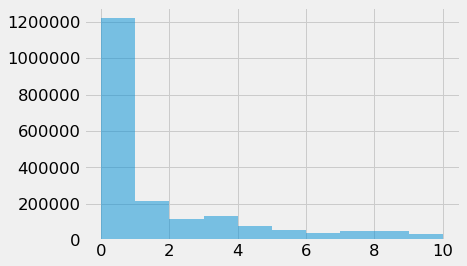

In [7]:
submit["open_channels"].hist(alpha=0.5)